# FBProphet - SO2

## Import Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/data_imputed.csv')
df.head()

,timestamp_local,temp,city_name,country_code,aqi,co,no2,o3,pm10,pm25,so2
0,2022-02-01 00:00:00,12.6,Gujrāt,PK,385.0,1339.8,76.0,10.7,491.7,347.67,238.0
1,2022-02-01 01:00:00,11.5,Gujrāt,PK,404.0,1437.6,76.0,9.3,508.3,359.33,268.0
2,2022-02-01 02:00:00,11.9,Gujrāt,PK,421.0,1535.5,76.0,8.0,525.0,371.00,298.0
3,2022-02-01 03:00:00,12.2,Gujrāt,PK,425.0,1659.0,68.3,5.3,529.3,374.00,275.7
4,2022-02-01 04:00:00,11.9,Gujrāt,PK,430.0,1782.5,60.7,2.7,533.7,377.00,253.3


In [3]:
df['timestamp_local'] = pd.to_datetime(df['timestamp_local'])

In [4]:
data = df[['timestamp_local','so2']]

In [5]:
data = data.rename(columns={'timestamp_local': 'ds', 'so2': 'y'})

In [6]:
X = data[:-168]

In [7]:
y = data[-168:]

## Model Fitting

In [8]:
from prophet import Prophet

In [9]:
m = Prophet()
m.fit(X)

23:10:42 - cmdstanpy - INFO - Chain [1] start processing
23:10:48 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = m.make_future_dataframe(periods=7*24, freq='H')
future.tail()

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
18211,2024-02-29 19:00:00
18212,2024-02-29 20:00:00
18213,2024-02-29 21:00:00
18214,2024-02-29 22:00:00
18215,2024-02-29 23:00:00


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18211,2024-02-29 19:00:00,35.046609,-10.341849,75.531437
18212,2024-02-29 20:00:00,41.300812,2.804724,84.683617
18213,2024-02-29 21:00:00,46.687202,3.802722,89.175508
18214,2024-02-29 22:00:00,51.016113,8.025296,90.980298
18215,2024-02-29 23:00:00,54.555642,12.129269,94.826121


C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


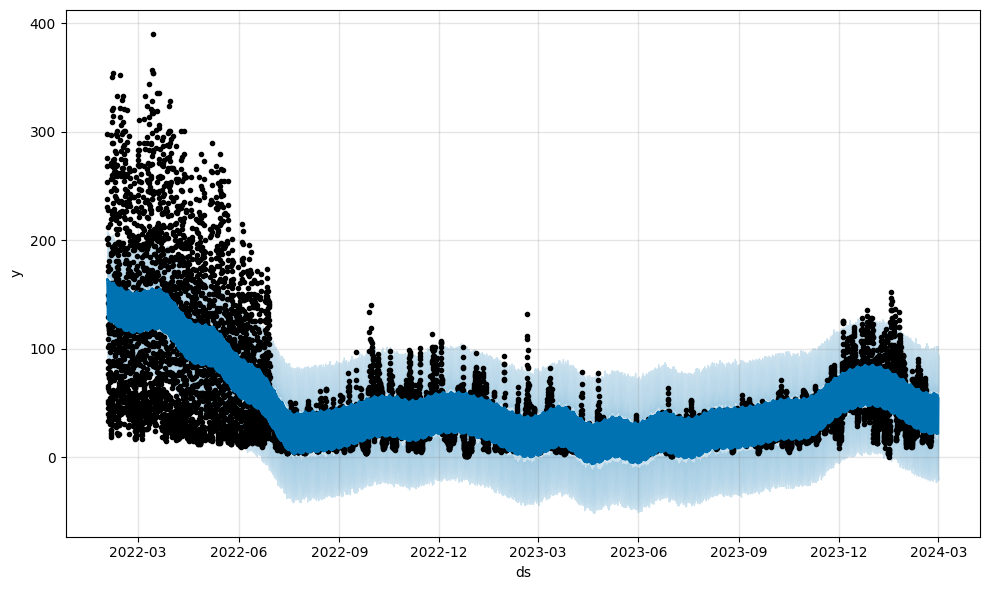

In [12]:
fig1 = m.plot(forecast)

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Se

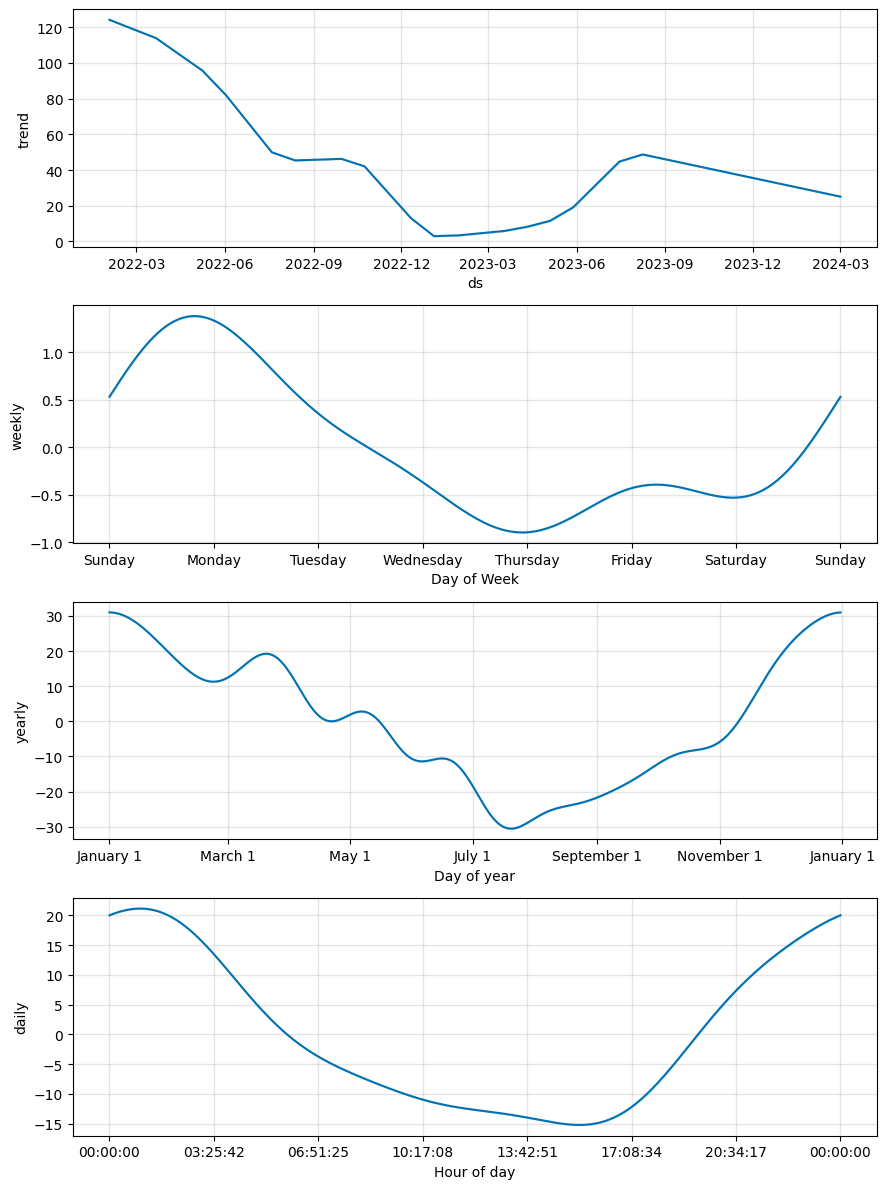

In [13]:
fig2 = m.plot_components(forecast)

In [14]:
predicted = forecast[-168:]

In [15]:
((y['y']-predicted['yhat'])**2).mean()**0.5

17.096537312525367

## Non Stationary

In [16]:
m = Prophet(interval_width=0.95)
m.fit(X)

23:11:07 - cmdstanpy - INFO - Chain [1] start processing
23:11:14 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
future = m.make_future_dataframe(periods=7*24, freq='H')
future.tail()

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
18211,2024-02-29 19:00:00
18212,2024-02-29 20:00:00
18213,2024-02-29 21:00:00
18214,2024-02-29 22:00:00
18215,2024-02-29 23:00:00


In [18]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18211,2024-02-29 19:00:00,35.046609,-29.347286,96.886197
18212,2024-02-29 20:00:00,41.300812,-20.780349,107.405283
18213,2024-02-29 21:00:00,46.687202,-10.635851,106.693024
18214,2024-02-29 22:00:00,51.016113,-16.108241,115.918823
18215,2024-02-29 23:00:00,54.555642,-9.225470,116.696688


<Axes: xlabel='ds'>

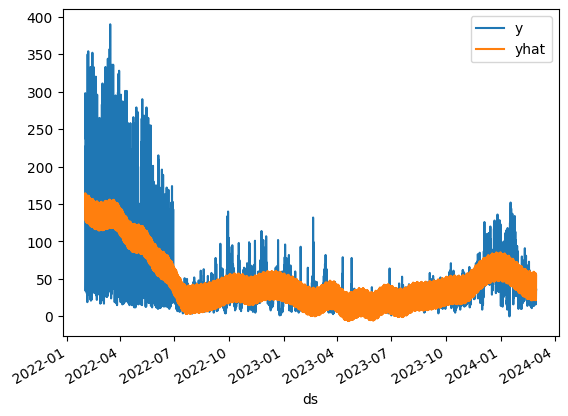

In [19]:
pd.concat([data.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

In [20]:
((y['y']-predicted['yhat'])**2).mean()**0.5

17.096537312525367

## Multiplicative

In [21]:
m = Prophet(interval_width=0.95, seasonality_mode='multiplicative')
m.fit(X)

23:11:25 - cmdstanpy - INFO - Chain [1] start processing
23:11:56 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
future = m.make_future_dataframe(periods=7*24, freq='H')
future.tail()

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
18211,2024-02-29 19:00:00
18212,2024-02-29 20:00:00
18213,2024-02-29 21:00:00
18214,2024-02-29 22:00:00
18215,2024-02-29 23:00:00


In [23]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18211,2024-02-29 19:00:00,23.553312,-15.336713,63.434906
18212,2024-02-29 20:00:00,30.337175,-9.628286,68.600831
18213,2024-02-29 21:00:00,36.538667,-4.039814,75.202829
18214,2024-02-29 22:00:00,42.311625,1.901809,79.750737
18215,2024-02-29 23:00:00,48.100774,3.369738,84.057097


<Axes: xlabel='ds'>

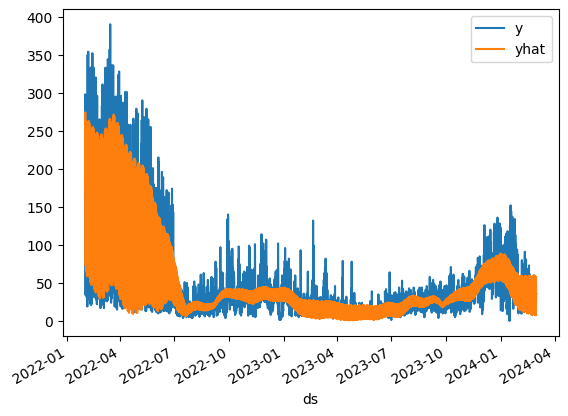

In [24]:
pd.concat([data.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

In [25]:
((data['y']-forecast['yhat'])**2).mean()**0.5

19.770901751200284

In [29]:
from prophet.diagnostics import cross_validation,  performance_metrics
cv_results = cross_validation( model = m, initial = '600 days', horizon = '30 days')
df_p = performance_metrics(cv_results)
df_p

  0%|          | 0/9 [00:00<?, ?it/s]

22:47:22 - cmdstanpy - INFO - Chain [1] start processing
22:47:28 - cmdstanpy - INFO - Chain [1] done processing
22:47:31 - cmdstanpy - INFO - Chain [1] start processing
22:47:37 - cmdstanpy - INFO - Chain [1] done processing
22:47:39 - cmdstanpy - INFO - Chain [1] start processing
22:47:46 - cmdstanpy - INFO - Chain [1] done processing
22:47:49 - cmdstanpy - INFO - Chain [1] start processing
22:48:01 - cmdstanpy - INFO - Chain [1] done processing
22:48:04 - cmdstanpy - INFO - Chain [1] start processing
22:48:09 - cmdstanpy - INFO - Chain [1] done processing
22:48:12 - cmdstanpy - INFO - Chain [1] start processing
22:48:18 - cmdstanpy - INFO - Chain [1] done processing
22:48:21 - cmdstanpy - INFO - Chain [1] start processing
22:48:29 - cmdstanpy - INFO - Chain [1] done processing
22:48:32 - cmdstanpy - INFO - Chain [1] start processing
22:48:42 - cmdstanpy - INFO - Chain [1] done processing
22:48:45 - cmdstanpy - INFO - Chain [1] start processing
22:48:57 - cmdstanpy - INFO - Chain [1]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days 00:00:00,1495.858682,38.676332,32.338025,0.217448,0.181402,0.209758,0.981481
1,3 days 01:00:00,1517.809054,38.959069,32.583886,0.218617,0.182028,0.211167,0.979938
2,3 days 02:00:00,1530.435942,39.120787,32.737556,0.219434,0.182355,0.212105,0.979938
3,3 days 03:00:00,1536.570404,39.199112,32.831366,0.219594,0.182697,0.212537,0.979938
4,3 days 04:00:00,1541.720257,39.264746,32.890824,0.219684,0.182953,0.212858,0.979938
...,...,...,...,...,...,...,...,...
644,29 days 20:00:00,3398.479245,58.296477,48.157774,0.307331,0.265264,0.308666,0.768519
645,29 days 21:00:00,3422.201988,58.499590,48.343800,0.309045,0.265659,0.309930,0.763889
646,29 days 22:00:00,3426.245787,58.534142,48.384592,0.310438,0.265264,0.310625,0.763889
647,29 days 23:00:00,3442.463154,58.672508,48.541577,0.312057,0.265264,0.311721,0.763889
